In [1]:

import plotly.graph_objs as go
import h5py
import numpy as np
import matplotlib.pyplot as plt 
from SerialReader import SerialReaderPlotter

s = SerialReaderPlotter("COM8", baudrate=9600)

In [2]:
keepAlive = False
    
fig = go.FigureWidget(data=[go.Scatter(x=[], y=[])])
fig.update_layout(
    template="plotly_white",
    xaxis_title="Time",
    yaxis_title="Temperature (C)",
)
s.start_reading(500)
s.start_writing(fig)
fig

(Reader   ) Starting
(Plotter  ) Starting


FigureWidget({
    'data': [{'type': 'scatter', 'uid': 'a503f120-4be1-4fc7-8d27-a6074eae6bdd', 'x': [], 'y': […

(Plotter  ) Waiting for Data


In [3]:
scatter = fig.data[0]

hf = h5py.File('RTA_Run.h5', 'w')
hf.create_dataset('Time', data=np.array(scatter.x, dtype=float))
hf.create_dataset('Temperature', data=np.array(scatter.y, dtype=float))
hf.close()

(Plotter  ) Waiting for Data
(Plotter  ) Waiting for Data
(Plotter  ) Waiting for Data
(Plotter  ) Waiting for Data


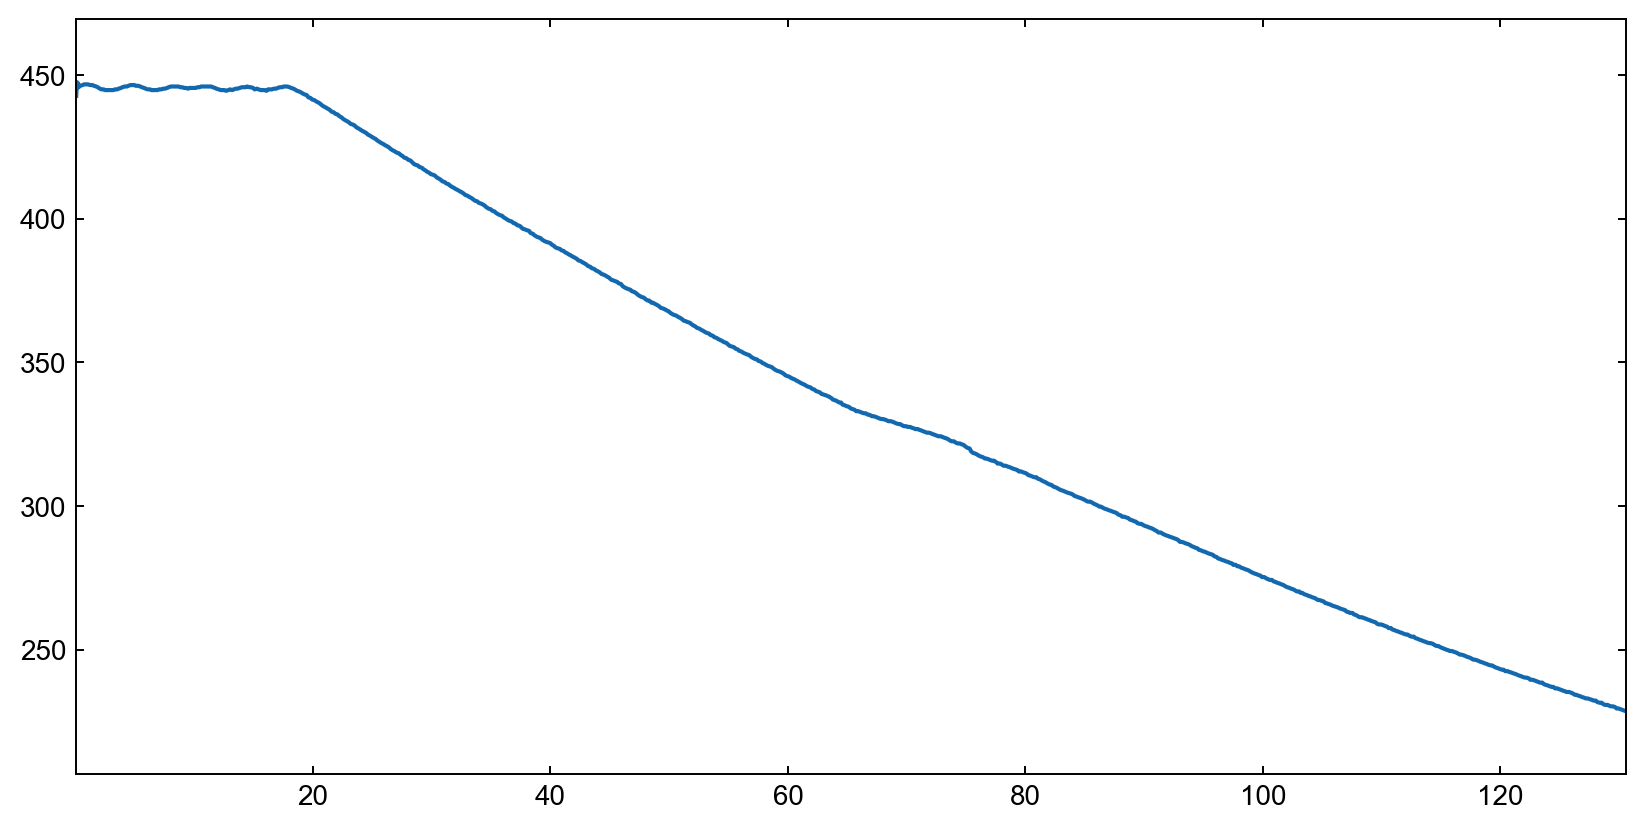

(Plotter  ) Waiting for Data


In [5]:
with plt.style.context(["sp-paper"]):
    mfig, ax = plt.subplots(figsize=(10,5))
    ax.plot(np.array(scatter.x, dtype=float), np.array(scatter.y, dtype=float))
    ax.autoscale(tight=True)
    ax.margins(y=0.1)